<a href="https://colab.research.google.com/github/PaulErpen/Machine-Learning-Exercise-1/blob/main/Group24_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Exercise 1
Group 24: Jasmin Wolff (12114335), Mihai Truta (12122518), Paul Erpenstein (12107369)

In [1]:
import multiprocessing
import pandas
import numpy
import time
from sklearn import metrics
from yellowbrick.classifier import ConfusionMatrix
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount("/content/gdrive")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Mounted at /content/gdrive


## Performance measures

We will use different performance measures to compare the performance of the different machine lerning solutions.
These performance measures are:
* Accurancy
* Precision
* Recall
* Specificity
* F1-Score

In order to evaluate the machine learning solutions we will also be using confusion matrices as a visualization of the classification results.

# Data set 1: Location 

First data set from the kaggle competition.

In [4]:
df_locations = pandas.read_csv("/content/gdrive/MyDrive/data/locations.csv")
print(df_locations.head())
print("This data set has {} observations.".format(df_locations.shape[0]))

   ID  class  1  2  3  4  5  6  7  ...  438  439  440  441  442  443  444  445  446
0   0     11  0  0  0  1  1  0  0  ...    0    0    0    1    0    0    0    0    0
1   1      3  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
2   2      9  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
3   3      8  0  0  0  1  0  0  0  ...    0    0    0    1    0    0    0    0    0
4   4      3  0  1  0  0  0  0  0  ...    0    0    0    0    0    1    0    0    0

[5 rows x 448 columns]
This data set has 4000 observations.


Each of these observations represents a person. There are 446 binary attributes, which denote wether a person has visited a specific location or not. Every person also belongs to a class. The task is to determine a persons class based on the places they visited.

In [5]:
df_location_performance_measures = pandas.DataFrame(
    columns = ["solution", "accurancy", "precision", "recall", "specificity", "f1"])

## Exploration & Preprocessing

In [6]:
df_locations.isnull().sum().sum()

0

There are no missing values in this data set and therefore no preprocessing needed.

In [7]:
print("There are {} unique classes a person can belong to.".format(len(df_locations["class"].unique())))

There are 30 unique classes a person can belong to.


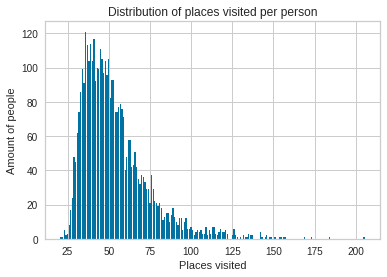

In [8]:
places_visited = df_locations.loc[:, '1':'446'].sum(axis=1) 
places_visited_distribution = places_visited.groupby(places_visited).count()
df_places_visited = pandas.DataFrame(data = {"nplaces" : places_visited_distribution.index, "countpeople": places_visited_distribution})
plt.bar(df_places_visited["nplaces"], df_places_visited["countpeople"])
plt.title("Distribution of places visited per person")
plt.ylabel("Amount of people")
plt.xlabel("Places visited")
plt.show()

A thing also worth considering is the amount of different places a person has visited. This might be a very predictive variable. This plot shows the amount of people grouped by how many places they have visited. There is a clear normal distribution, indicating that this measurement has a structure to it that might have predictive qualities.

In [ ]:
#df_locations["n_places_visited"] = df_locations.loc[:, '1':'446'].sum(axis=1) 

Turns out this decreases prediction performance.

### Train and test split



In [9]:
from sklearn.model_selection import train_test_split

y = df_locations.copy(deep="true")["class"]
X = df_locations.copy(deep="true").drop('class', axis=1).drop('ID', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print("The size of the training split is {} and the size of the test split is {}.".format(X_train.shape[0], X_test.shape[0]))

display(X_train)

The size of the training split is 3200 and the size of the test split is 800.


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446
1420,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1638,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
616,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
184,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2075,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1346,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3454,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3437,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


### Scaling

In [ ]:
from sklearn import preprocessing

scaler_location = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_location.transform(X_train)
X_test_scaled = scaler_location.transform(X_test)
display(X_train_scaled)

array([[ 4.02545663, -0.46554273, -0.23167086, ..., -0.25888673,
         2.65715137, -0.24699789],
       [-0.24841902, -0.46554273, -0.23167086, ..., -0.25888673,
        -0.37634288, -0.24699789],
       [-0.24841902, -0.46554273, -0.23167086, ...,  3.8626931 ,
        -0.37634288, -0.24699789],
       ...,
       [-0.24841902, -0.46554273, -0.23167086, ..., -0.25888673,
        -0.37634288, -0.24699789],
       [-0.24841902, -0.46554273, -0.23167086, ..., -0.25888673,
        -0.37634288, -0.24699789],
       [-0.24841902, -0.46554273, -0.23167086, ..., -0.25888673,
        -0.37634288, -0.24699789]])

## KNN

### Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 26)
scores = {}

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  scores[k] = metrics.accuracy_score(y_test, y_pred)

idx_max_accurancy = numpy.argmax(scores)

{1: 0.295,
 2: 0.30875,
 3: 0.29375,
 4: 0.3075,
 5: 0.31,
 6: 0.325,
 7: 0.33375,
 8: 0.3375,
 9: 0.33125,
 10: 0.33875,
 11: 0.3375,
 12: 0.33625,
 13: 0.335,
 14: 0.3325,
 15: 0.34,
 16: 0.33,
 17: 0.3325,
 18: 0.33625,
 19: 0.3325,
 20: 0.33625,
 21: 0.34375,
 22: 0.34,
 23: 0.33875,
 24: 0.34375,
 25: 0.33875}

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors = idx_max_accurancy)
knn.fit(X_train_scaled, y_train)

### Evaluation

#### Confusion matrix

In [ ]:
cm = ConfusionMatrix(knn_best, classes=sorted(df_locations["class"].unique()))
cm.score(X_test_scaled, y_test_scaled)

Evaluation measures

In [ ]:
y_pred = knn_best.predict(X_test_scaled)
df_location_performance_measures.append(["KNN",
                                         metrics.accurancy_score(y_test_scaled, y_pred),
                                         metrics.precision_score(y_test_scaled, y_pred),
                                         metrics.recall_score(y_test_scaled, y_pred),
                                         metrics.specificity_score(y_test_scaled, y_pred),
                                         metrics.f1_score(y_test_scaled, y_pred)])

## Neural Network/Multilayer Perceptron 

### Training

According to Heaton there is no theoratical basis for using a network with more than two layers [Heat08].

In [10]:
from sklearn.neural_network import MLPClassifier

def fit_multilayer_perceptron(n_layers, n_neurons, X_train, y_train, X_test, y_test, queue):
  multi_layer_perceptron = MLPClassifier(solver='lbfgs', 
                                         random_state=123, 
                                         hidden_layer_sizes=numpy.repeat(n_neurons, repeats=n_layers))
  multi_layer_perceptron.fit(X_train, y_train)
  y_pred = multi_layer_perceptron.predict(X_test)
  queue.put((n_layers, n_neurons, metrics.accuracy_score(y_test, y_pred)))

queue = multiprocessing.Queue()
ps = []

for n_layers in range(1, 3, 1):
  for n_neurons in range(30, 800, 40):
    p = multiprocessing.Process(target=fit_multilayer_perceptron, 
                args=(n_layers, n_neurons, X_train, y_train, X_test, y_test, queue))
    p.start()
    ps.append(p)
    print("Spawned process {}".format(p.pid))

arr = []

while len(ps) > 0:
  pids = []
  for p in ps:
    if not p.is_alive():
      arr.append(queue.get())
      pids.append(p.pid)
      print("Removed process {}".format(p.pid))
  ps = list(filter(lambda p: p.pid not in pids, ps))
  time.sleep(1)

df_neural_netowrk_res = pandas.DataFrame.from_records(arr, columns=["n_layers", "n_neurons", "accurancy"])

Spawned process 288
Spawned process 289
Spawned process 290
Spawned process 291
Spawned process 292
Spawned process 293
Spawned process 294
Spawned process 295
Spawned process 296
Spawned process 297
Spawned process 298
Spawned process 299
Spawned process 300
Spawned process 301
Spawned process 302
Spawned process 303
Spawned process 304
Spawned process 305
Spawned process 306
Spawned process 307
Spawned process 308
Spawned process 309
Spawned process 310
Spawned process 311
Spawned process 312
Spawned process 313
Spawned process 314
Spawned process 315
Spawned process 316
Spawned process 318
Spawned process 319
Spawned process 320
Spawned process 321
Spawned process 322
Spawned process 324
Spawned process 325
Spawned process 327
Spawned process 328
Spawned process 329
Spawned process 330
Removed process 288
Removed process 289
Removed process 290
Removed process 291
Removed process 308
Removed process 292
Removed process 293
Removed process 294
Removed process 295
Removed process 310


In [11]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_neural_netowrk_res)

    n_layers  n_neurons  accurancy
0          1         30    0.68000
1          1         70    0.70375
2          1        110    0.73750
3          1        150    0.72375
4          2         30    0.63500
5          1        190    0.74000
6          1        230    0.76000
7          1        270    0.71625
8          1        310    0.75250
9          2        110    0.71000
10         1        390    0.73000
11         2         70    0.71125
12         1        470    0.73875
13         1        350    0.72875
14         1        430    0.77125
15         1        510    0.73000
16         1        550    0.73875
17         1        670    0.72750
18         1        590    0.75250
19         1        630    0.76000
20         1        710    0.74625
21         1        750    0.76500
22         1        790    0.74625
23         2        150    0.72750
24         2        230    0.72125
25         2        190    0.71250
26         2        270    0.73250
27         2        

20
20


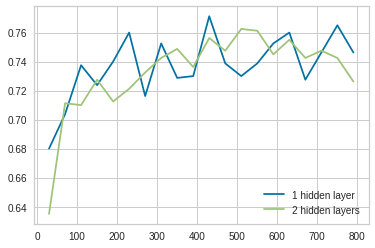

In [12]:
df_nn_1 = df_neural_netowrk_res[df_neural_netowrk_res["n_layers"] == 1].sort_values("n_neurons")
df_nn_2 = df_neural_netowrk_res[df_neural_netowrk_res["n_layers"] == 2].sort_values("n_neurons")
print(df_nn_1.shape[0])
print(df_nn_2.shape[0])
plt.plot(df_nn_1["n_neurons"], df_nn_1["accurancy"], label="1 hidden layer")
plt.plot(df_nn_2["n_neurons"], df_nn_2["accurancy"], label="2 hidden layers")
plt.legend()
plt.show()

### Evaluation

#### Confusion Matrix

0.75375

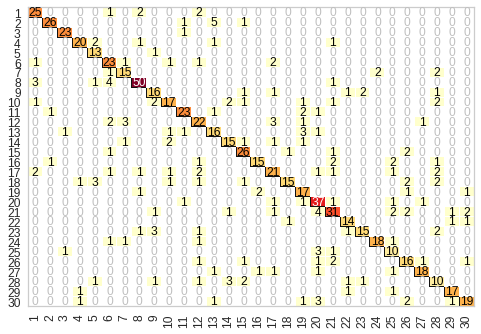

In [ ]:
cm = ConfusionMatrix(multi_layer_perceptron, classes=sorted(df_locations["class"].unique()))
cm.score(X_test, y_test)

#### Evaluation measures

In [ ]:
df_location_performance_measures.append(["Neural Network",
                                         metrics.accurancy_score(y_test, y_pred),
                                         metrics.precision_score(y_test, y_pred),
                                         metrics.recall_score(y_test, y_pred),
                                         metrics.specificity_score(y_test, y_pred),
                                         metrics.f1_score(y_test, y_pred)])

## Decision Tree

### Training

In [ ]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print("The prediciton accurancy for the decision tree is {}.".format(metrics.accuracy_score(y_test, y_pred)))

### Evaluation


#### Confusion Matrix

In [ ]:
cm = ConfusionMatrix(decision_tree, classes=sorted(df_locations["class"].unique()))
cm.score(X_test, y_test)

#### Evaluation measures

In [ ]:
df_location_performance_measures.append(["Decision Tree",
                                         metrics.accurancy_score(y_test, y_pred),
                                         metrics.precision_score(y_test, y_pred),
                                         metrics.recall_score(y_test, y_pred),
                                         metrics.specificity_score(y_test, y_pred),
                                         metrics.f1_score(y_test, y_pred)])

## Comparison

In [ ]:
display(df_location_performance_measures)

# Data set 2: Congressional Voting

Second data set from the kaggle competition.

In [ ]:
df_congress = pandas.read_csv("/content/gdrive/MyDrive/data/congressional.csv")
with pandas.option_context('display.max_columns', None):
  display(df_congress.head())

    ID       class  ... duty-free-exports export-administration-act-south-africa
0   67  republican  ...                 n                                      y
1  338    democrat  ...                 y                                      y
2   35    democrat  ...                 y                                      y
3  122  republican  ...                 n                                      y
4  420    democrat  ...                 n                                      y

[5 rows x 18 columns]


# Data set 3: COVID-19

The data set from exercise 0.

In [ ]:
df_covid = pandas.read_csv("/content/gdrive/MyDrive/data/covid.csv")
print(df_covid.head())

       id  sex  patient_type  ... contact_other_covid covid_res icu
0  16169f    2             1  ...                   2         1  97
1  1009bf    2             1  ...                  99         1  97
2  167386    1             2  ...                  99         1   2
3  0b5948    2             2  ...                  99         1   2
4  0d01b5    1             2  ...                  99         1   2

[5 rows x 23 columns]


# Data set 4: Airline customer satisfaction

A completely new data set for classifocation.

In [ ]:
df_airline = pandas.read_csv("/content/gdrive/MyDrive/data/airline.csv")
print(df_airline.head())

   Unnamed: 0      id  ... Arrival Delay in Minutes             satisfaction
0           0   70172  ...                     18.0  neutral or dissatisfied
1           1    5047  ...                      6.0  neutral or dissatisfied
2           2  110028  ...                      0.0                satisfied
3           3   24026  ...                      9.0  neutral or dissatisfied
4           4  119299  ...                      0.0                satisfied

[5 rows x 25 columns]


# Sources

[Heat08] Jeff Heaton. 2008. <i>Introduction to Neural Networks for Java, 2nd Edition</i> (2nd. ed.). Heaton Research, Inc.